In [109]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/adult-census-income/adult.csv


In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('/kaggle/input/adult-census-income/adult.csv')
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [111]:
df['native.country'].unique()

array(['United-States', '?', 'Mexico', 'Greece', 'Vietnam', 'China',
       'Taiwan', 'India', 'Philippines', 'Trinadad&Tobago', 'Canada',
       'South', 'Holand-Netherlands', 'Puerto-Rico', 'Poland', 'Iran',
       'England', 'Germany', 'Italy', 'Japan', 'Hong', 'Honduras', 'Cuba',
       'Ireland', 'Cambodia', 'Peru', 'Nicaragua', 'Dominican-Republic',
       'Haiti', 'El-Salvador', 'Hungary', 'Columbia', 'Guatemala',
       'Jamaica', 'Ecuador', 'France', 'Yugoslavia', 'Scotland',
       'Portugal', 'Laos', 'Thailand', 'Outlying-US(Guam-USVI-etc)'],
      dtype=object)

In [112]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [113]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [114]:
df['capital.gain'] = df['capital.gain'].replace(0,df['capital.gain'].mean())
df['capital.loss'] = df['capital.loss'].replace(0,df['capital.loss'].mean())

In [115]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,1077.648844,4356.0,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,1077.648844,4356.0,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,1077.648844,4356.0,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,1077.648844,3900.0,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,1077.648844,3900.0,40,United-States,<=50K


In [116]:
#df['workclass']=df['workclass'].replace('?','undef')
df['occupation'] = df['occupation'].replace('?','occu')
df['native.country'] = df['native.country'].replace('?','country')

In [117]:
df["sex"] = df["sex"].map({"Male": 0, "Female":1})

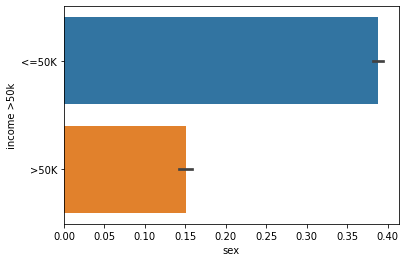

In [118]:
g=sns.barplot(x='sex',y='income',data=df)
g=g.set_ylabel('income >50k')
plt.show()


In [119]:
# df.fillna(df.mean(),inplace=True)

df['workclass'].unique

<bound method Series.unique of 0              ?
1        Private
2              ?
3        Private
4        Private
          ...   
32556    Private
32557    Private
32558    Private
32559    Private
32560    Private
Name: workclass, Length: 32561, dtype: object>

In [120]:
df=df.drop(columns='workclass',axis=1)

In [121]:
from sklearn.preprocessing import StandardScaler , LabelEncoder ,OneHotEncoder
label = LabelEncoder()
df['marital.status'] = label.fit_transform(df['marital.status'])
df['race'] = label.fit_transform(df['race'])
df['sex'] = label.fit_transform(df['sex'])
df['education'] = label.fit_transform(df['education'])
#df['workclass'] = label.fit_transform(df['workclass'])
df['occupation'] = label.fit_transform(df['occupation'])
df['native.country'] = label.fit_transform(df['native.country'])
df['relationship'] = label.fit_transform(df['relationship'])
df['income'] = label.fit_transform(df['income'])

In [122]:
df['native.country'].unique()


array([38, 41, 25, 11, 39,  2, 35, 18, 29, 37,  1, 34, 14, 32, 30, 19,  8,
       10, 21, 23, 16, 15,  4, 20,  0, 28, 26,  5, 13,  7, 17,  3, 12, 22,
        6,  9, 40, 33, 31, 24, 36, 27])

In [123]:
df.columns

Index(['age', 'fnlwgt', 'education', 'education.num', 'marital.status',
       'occupation', 'relationship', 'race', 'sex', 'capital.gain',
       'capital.loss', 'hours.per.week', 'native.country', 'income'],
      dtype='object')

In [124]:
X = df.drop(columns='income')
y=df['income']


In [125]:
scaler = StandardScaler()
X_scaled=scaler.fit_transform(X)


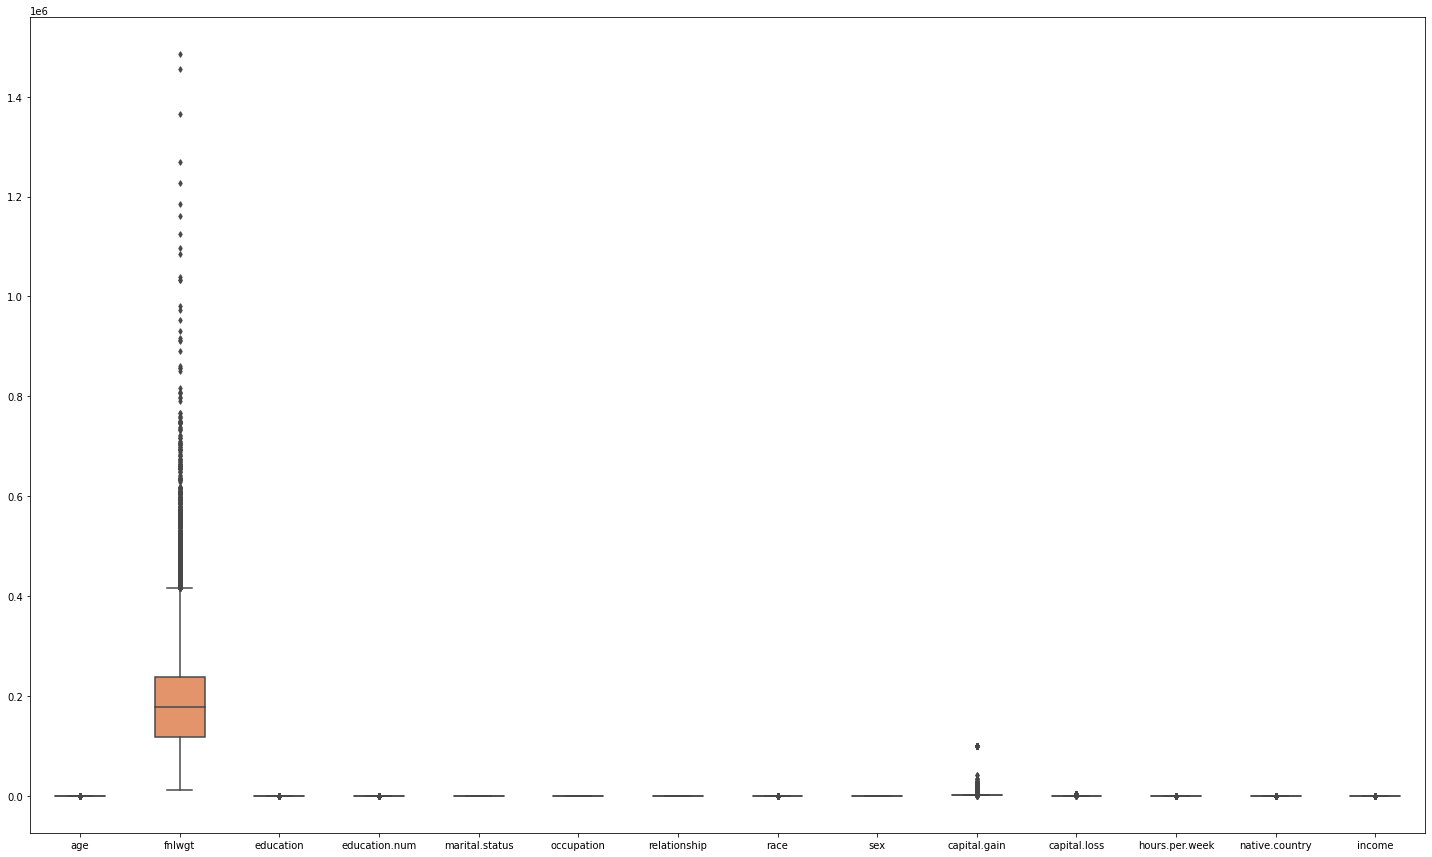

In [126]:
fig,ax=plt.subplots(figsize=(25,15),facecolor='white')
sns.boxplot(data=df,ax=ax,width=0.5,fliersize=4)

In [127]:
q=df['fnlwgt'].quantile(0.80)
data_cleaned = df[df['fnlwgt']<q]
q=df['age'].quantile(0.99)
data_cleaned = df[df['age']<q]
q=df['education'].quantile(0.99)
data_cleaned = df[df['education']<q]
q=df['education.num'].quantile(0.99)
data_cleaned=df[df['education.num']<q]
q=df['capital.gain'].quantile(0.95)
data_cleaned=df[df['capital.gain']<q]
q=df['race'].quantile(0.99)
data_cleaned=df[df['race']<q]
q=df['capital.loss'].quantile(0.98)
data_cleaned=df[df['capital.loss']<q]
q=df['education.num'].quantile(0.99)
data_cleaned=df[df['education.num']<q]
q=df['native.country'].quantile(0.98)
data_cleaned=df[df['native.country']<q]
q=df['hours.per.week'].quantile(0.98)
data_cleaned=df[df['hours.per.week']<q]

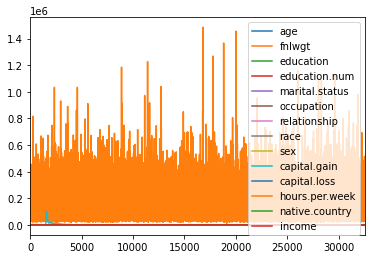

In [128]:
df.plot()

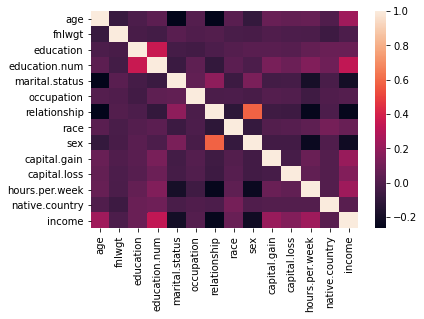

In [129]:
sns.heatmap(df.corr())

In [130]:
y.unique

<bound method Series.unique of 0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    0
32558    1
32559    0
32560    0
Name: income, Length: 32561, dtype: int64>

In [142]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.3,random_state=135)
rf= RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_class = rf.predict(X_test)
accuracy_score(y_pred_class,y_test)

0.8522878493192753

In [144]:
print(rf.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [234]:
random_grid = {'n_estimators': [1,2,3,4,5,6,7,15,20,25,260,600,900],
               'max_features': ['auto', 'sqrt'],
               'max_depth': [10, 20, 30, 40, 50, 60],
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2, 4],
               'bootstrap': [True, False]}

In [189]:
from sklearn.model_selection import RandomizedSearchCV
randomcv= RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [190]:
randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   43.8s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  3.2min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [193]:
randomcv.best_params_

{'n_estimators': 600,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 40,
 'bootstrap': True}

In [231]:
model = RandomForestClassifier(n_estimators=260,min_samples_split=10,min_samples_leaf=4,max_features='auto',max_depth=40,bootstrap=True)

In [232]:
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=40, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=260,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [233]:
y_predict = model.predict(X_test)
accuracy_score(y_test,y_predict)

0.8626266762206981